<a href="https://colab.research.google.com/github/andrewwhite5/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module2-loadingdata/LS_DS_112_Loading_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Loading, Cleaning and Visualizing Data

Objectives for today:
- Load data from multiple sources into a Python notebook 
 - !curl method
 - CSV upload method
- Create basic plots appropriate for different data types
 - Scatter Plot
 - Histogram
 - Density Plot
 - Pairplot
- "Clean" a dataset using common Python libraries
 - Removing NaN values "Interpolation"

# Part 1 - Loading Data

Data comes in many shapes and sizes - we'll start by loading tabular data, usually in csv format.

Data set sources:

- https://archive.ics.uci.edu/ml/datasets.html
- https://github.com/awesomedata/awesome-public-datasets
- https://registry.opendata.aws/ (beyond scope for now, but good to be aware of)

Let's start with an example - [data about flags](https://archive.ics.uci.edu/ml/datasets/Flags).

## Lecture example - flag data

In [0]:
# Step 1 - find the actual file to download

# From navigating the page, clicking "Data Folder"
flag_data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data'

# You can "shell out" in a notebook for more powerful tools
# https://jakevdp.github.io/PythonDataScienceHandbook/01.05-ipython-and-shell-commands.html

# Funny extension, but on inspection looks like a csv
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data

# Extensions are just a norm! You have to inspect to be sure what something is

Afghanistan,5,1,648,16,10,2,0,3,5,1,1,0,1,1,1,0,green,0,0,0,0,1,0,0,1,0,0,black,green
Albania,3,1,29,3,6,6,0,0,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,0,1,0,red,red
Algeria,4,1,2388,20,8,2,2,0,3,1,1,0,0,1,0,0,green,0,0,0,0,1,1,0,0,0,0,green,white
American-Samoa,6,3,0,0,1,1,0,0,5,1,0,1,1,1,0,1,blue,0,0,0,0,0,0,1,1,1,0,blue,red
Andorra,3,1,0,0,6,0,3,0,3,1,0,1,1,0,0,0,gold,0,0,0,0,0,0,0,0,0,0,blue,red
Angola,4,2,1247,7,10,5,0,2,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,1,0,0,red,black
Anguilla,1,4,0,0,1,1,0,1,3,0,0,1,0,1,0,1,white,0,0,0,0,0,0,0,0,1,0,white,blue
Antigua-Barbuda,1,4,0,0,1,1,0,1,5,1,0,1,1,1,1,0,red,0,0,0,0,1,0,1,0,0,0,black,red
Argentina,2,3,2777,28,2,0,0,3,2,0,0,1,0,1,0,0,blue,0,0,0,0,0,0,0,0,0,0,blue,blue
Argentine,2,3,2777,28,2,0,0,3,3,0,0,1,1,1,0,0,blue,0,0,0,0,1,0,0,0,0,0,blue,blue
Australia,6,2,7690,15,1,1,0,0,3,1,0,1,0,1,0,0,blue,0,1,1,1,6,0,0,0,0,0,white,blue
Austria,3,1,84,8,4,0,0,3,2,1,0,0,0,1,0,0,red,0,0,0,0,0,0,0,0,0,0,red,red
Bahamas,1,4,19,0,1,1,0,3,3,0,0,1,1,0,1,0,blue,0,0,

In [0]:
# Step 2 - load the data

# How to deal with a csv? 🐼
import pandas as pd
flag_data = pd.read_csv(flag_data_url)

In [0]:
# Step 3 - verify we've got *something*
flag_data.head()

,Afghanistan,5,1,648,16,10,2,0,3,5.1,1.1,1.2,0.1,1.3,1.4,1.5,0.2,green,0.3,0.4,0.5,0.6,1.6,0.7,0.8,1.7,0.9,0.10,black,green.1
0,Albania,3,1,29,3,6,6,0,0,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,0,1,0,red,red
1,Algeria,4,1,2388,20,8,2,2,0,3,1,1,0,0,1,0,0,green,0,0,0,0,1,1,0,0,0,0,green,white
2,American-Samoa,6,3,0,0,1,1,0,0,5,1,0,1,1,1,0,1,blue,0,0,0,0,0,0,1,1,1,0,blue,red
3,Andorra,3,1,0,0,6,0,3,0,3,1,0,1,1,0,0,0,gold,0,0,0,0,0,0,0,0,0,0,blue,red
4,Angola,4,2,1247,7,10,5,0,2,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,1,0,0,red,black


In [0]:
# Step 4 - Looks a bit odd - verify that it is what we want
flag_data.count()

Afghanistan    193
5              193
1              193
648            193
16             193
10             193
2              193
0              193
3              193
5.1            193
1.1            193
1.2            193
0.1            193
1.3            193
1.4            193
1.5            193
0.2            193
green          193
0.3            193
0.4            193
0.5            193
0.6            193
1.6            193
0.7            193
0.8            193
1.7            193
0.9            193
0.10           193
black          193
green.1        193
dtype: int64

In [0]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data | wc

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 15240  100 15240    0     0  88092      0 --:--:-- --:--:-- --:--:-- 88092
    194     194   15240


In [0]:
# So we have 193 observations with funny names, file has 194 rows
# Looks like the file has no header row, but read_csv assumes it does
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer, sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=None, error_bad_lines=True, warn_bad_lines=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)
    Read a comma-separated values (csv) file into DataFrame.
    
    Also supports option

In [0]:
?pd.read_csv

In [0]:
??pd.read_csv

In [0]:
# Alright, we can pass header=None to fix this
flag_data = pd.read_csv(flag_data_url, header=None)
flag_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,Afghanistan,5,1,648,16,10,2,0,3,5,1,1,0,1,1,1,0,green,0,0,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,1,1,0,0,1,0,0,green,0,0,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,1,0,1,1,1,0,1,blue,0,0,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,1,0,1,1,0,0,0,gold,0,0,0,0,0,0,0,0,0,0,blue,red


In [0]:
flag_data.count()

0     194
1     194
2     194
3     194
4     194
5     194
6     194
7     194
8     194
9     194
10    194
11    194
12    194
13    194
14    194
15    194
16    194
17    194
18    194
19    194
20    194
21    194
22    194
23    194
24    194
25    194
26    194
27    194
28    194
29    194
dtype: int64

In [0]:
flag_data.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
dtype: int64

### Yes, but what does it *mean*?

This data is fairly nice - it was "donated" and is already "clean" (no missing values). But there are no variable names - so we have to look at the codebook (also from the site).

```
1. name: Name of the country concerned
2. landmass: 1=N.America, 2=S.America, 3=Europe, 4=Africa, 4=Asia, 6=Oceania
3. zone: Geographic quadrant, based on Greenwich and the Equator; 1=NE, 2=SE, 3=SW, 4=NW
4. area: in thousands of square km
5. population: in round millions
6. language: 1=English, 2=Spanish, 3=French, 4=German, 5=Slavic, 6=Other Indo-European, 7=Chinese, 8=Arabic, 9=Japanese/Turkish/Finnish/Magyar, 10=Others
7. religion: 0=Catholic, 1=Other Christian, 2=Muslim, 3=Buddhist, 4=Hindu, 5=Ethnic, 6=Marxist, 7=Others
8. bars: Number of vertical bars in the flag
9. stripes: Number of horizontal stripes in the flag
10. colours: Number of different colours in the flag
11. red: 0 if red absent, 1 if red present in the flag
12. green: same for green
13. blue: same for blue
14. gold: same for gold (also yellow)
15. white: same for white
16. black: same for black
17. orange: same for orange (also brown)
18. mainhue: predominant colour in the flag (tie-breaks decided by taking the topmost hue, if that fails then the most central hue, and if that fails the leftmost hue)
19. circles: Number of circles in the flag
20. crosses: Number of (upright) crosses
21. saltires: Number of diagonal crosses
22. quarters: Number of quartered sections
23. sunstars: Number of sun or star symbols
24. crescent: 1 if a crescent moon symbol present, else 0
25. triangle: 1 if any triangles present, 0 otherwise
26. icon: 1 if an inanimate image present (e.g., a boat), otherwise 0
27. animate: 1 if an animate image (e.g., an eagle, a tree, a human hand) present, 0 otherwise
28. text: 1 if any letters or writing on the flag (e.g., a motto or slogan), 0 otherwise
29. topleft: colour in the top-left corner (moving right to decide tie-breaks)
30. botright: Colour in the bottom-left corner (moving left to decide tie-breaks)
```

Exercise - read the help for `read_csv` and figure out how to load the data with the above variable names. One pitfall to note - with `header=None` pandas generated variable names starting from 0, but the above list starts from 1...

In [0]:
col_headers = ['name','landmass','zone','area','population','language','religion','bars','stripes','colours','red',
              'green','blue','gold','white','black','orange','mainhue','circles','crosses','saltires','quarters',
              'sunstars','crescent','triangle','icon','animate','text','topleft','botright']

flag_data = pd.read_csv(flag_data_url, header=None, names=col_headers)
flag_data.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,red,green,blue,gold,white,black,orange,mainhue,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,1,1,0,1,1,1,0,green,0,0,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,1,1,0,0,1,0,0,green,0,0,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,1,0,1,1,1,0,1,blue,0,0,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,1,0,1,1,0,0,0,gold,0,0,0,0,0,0,0,0,0,0,blue,red


In [0]:
flag_data.mask['language']
  1 = 'English'
  2 = 'Spanish'
  3 = 'French'
  4 = 'German'
  5 = 'Slavic'
  6 = 'Other Indo-European'
  7 = 'Chinese'
  8 = 'Arabic'

IndentationError: ignored

In [0]:
flag_data['language'] = flag_data['language'].map[1='English', 2='Spanish', 3='French', 4='German', 5='Slavic', 6='Other Indo-European', 7='Chinese', 8='Arabic']

SyntaxError: ignored

In [0]:
language = {
1 : 'English',
2 : 'Spanish',
3 : 'French',
4 : 'German',
5 : 'Slavic',
6 : 'ther Indo-European',
7 : 'Chinese',
8 : 'Arabic',
9 : 'Japanese/Turkish/Finnish/Magyar',
10 : 'Others'
}

flag_data1 = flag_data.copy()
flag_data1[5] =  flag_data1[5].map(language)
flag_data1.head()

KeyError: ignored

In [0]:
di = {1:"English", 2:"Spanish", 3:"French", 4:"German", 5:"Slavic", 6:"Other Indo-European",
     7:"Chinese", 8:"Arabic", 9:"Japanese/Turkish/Finnish/Magyar", 10:"Others"}
flag_data['language'] = flag_data.replace({"language": di})
flag_data.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,red,green,blue,gold,white,black,orange,mainhue,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,Afghanistan,2,0,3,5,1,1,0,1,1,1,0,green,0,0,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,Albania,6,0,0,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,Algeria,2,2,0,3,1,1,0,0,1,0,0,green,0,0,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,American-Samoa,1,0,0,5,1,0,1,1,1,0,1,blue,0,0,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,Andorra,0,3,0,3,1,0,1,1,0,0,0,gold,0,0,0,0,0,0,0,0,0,0,blue,red


##Reading other CSV's

In [0]:
link1 = 'https://raw.githubusercontent.com/BJanota11/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module2-loadingdata/drinks_with_regions.csv'
link2 = 'https://raw.githubusercontent.com/BJanota11/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module2-loadingdata/drinks_with_regions_index.csv'
link3 = 'https://raw.githubusercontent.com/BJanota11/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module2-loadingdata/drinks_with_regions_header.csv'

In [0]:
df = pd.read_csv(link1)
print(df.shape)
df.head()

(193, 7)


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,region,sub-region
0,Afghanistan,0,0,0,0.0,Asia,Southern Asia
1,Albania,89,132,54,4.9,Europe,Southern Europe
2,Algeria,25,0,14,0.7,Africa,Northern Africa
3,Andorra,245,138,312,12.4,Europe,Southern Europe
4,Angola,217,57,45,5.9,Africa,Sub-Saharan Africa


In [0]:
df = pd.read_csv(link2, index_col=0)
print(df.shape)
df.head()

(193, 7)


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,region,sub-region
0,Afghanistan,0,0,0,0.0,Asia,Southern Asia
1,Albania,89,132,54,4.9,Europe,Southern Europe
2,Algeria,25,0,14,0.7,Africa,Northern Africa
3,Andorra,245,138,312,12.4,Europe,Southern Europe
4,Angola,217,57,45,5.9,Africa,Sub-Saharan Africa


In [0]:
df = pd.read_csv(link3, header=3)  # Could also use "skiprows" instead of "header"
print(df.shape)
df.head()

(193, 7)


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,region,sub-region
0,Afghanistan,0,0,0,0.0,Asia,Southern Asia
1,Albania,89,132,54,4.9,Europe,Southern Europe
2,Algeria,25,0,14,0.7,Africa,Northern Africa
3,Andorra,245,138,312,12.4,Europe,Southern Europe
4,Angola,217,57,45,5.9,Africa,Sub-Saharan Africa


## Loading from a local CSV to Google Colab

In [0]:
from google.colab import files
uploaded = files.upload()

# Part 2 - Basic Visualizations

## Basic Data Visualizations Using Matplotlib

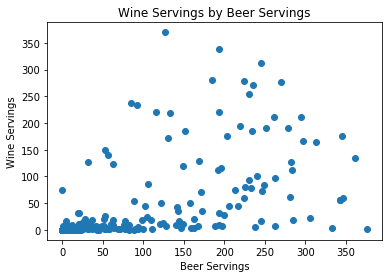

In [0]:
import matplotlib.pyplot as plt

# Scatter Plot
plt.scatter(df.beer_servings, df.wine_servings)
plt.title('Wine Servings by Beer Servings')
plt.xlabel('Beer Servings')
plt.ylabel('Wine Servings')
plt.show()

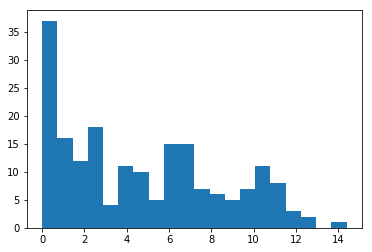

In [0]:
# Histogram
plt.hist(df.total_litres_of_pure_alcohol, bins=20);

In [0]:
# Seaborn Density Plot

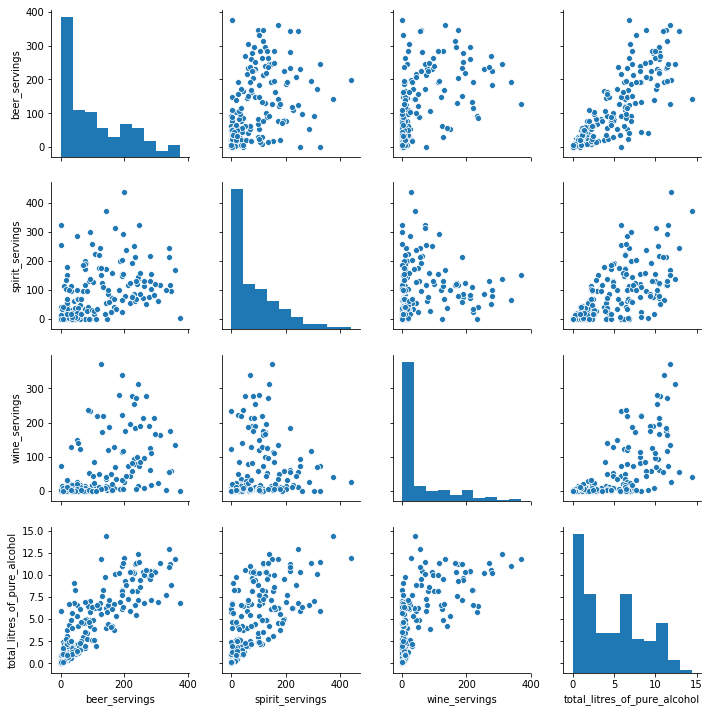

In [0]:
# Seaborn Pairplot
import seaborn as sns

sns.pairplot(df);

## Create the same basic Visualizations using Pandas

In [0]:
# Pandas Histogram - Look familiar?

In [0]:
# Pandas Scatterplot

In [0]:
# Pandas Scatter Matrix - Usually doesn't look too great.

# Part 3 - Deal with Missing Values

## Diagnose Missing Values

Lets use the Adult Dataset from UCI. <https://github.com/ryanleeallred/datasets>

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values='?')
print(df.shape)
df.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [0]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

In [0]:
df.country.value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [0]:
df.country.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [0]:
df.dropna(subset=['country'], inplace=True)
df.shape
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Fill Missing Values

In [0]:
df.mode()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,36.0,Private,123011,HS-grad,9.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
1,NaN,NaN,164190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,203488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
df.fillna(df.mode())
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

In [0]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Your assignment - pick a dataset and do something like the above

This is purposely open-ended - you can pick any data set you wish. It is highly advised you pick a dataset from UCI or a similar semi-clean source. You don't want the data that you're working with for this assignment to have any bigger issues than maybe not having headers or including missing values, etc.

After you have chosen your dataset, do the following:

- Import the dataset using the method that you are least comfortable with (!curl or CSV upload).
 - Make sure that your dataset has the number of rows and columns that you expect.
 - Make sure that your dataset has appropriate column names, rename them if necessary.
 - If your dataset uses markers like "?" to indicate missing values, replace them with NaNs during import.
- Identify and fill missing values in your dataset (if any)
 - Don't worry about using methods more advanced than the `.fillna()` function for today.
- Create one of each of the following plots using your dataset
 - Scatterplot
 - Histogram
 - Density Plot
 - Pairplot (note that pairplots will take a long time to load with large datasets or datasets with many columns)

If you get that done and want to try more challenging or exotic things, go for it! Use documentation as illustrated above, and follow the 20-minute rule (that is - ask for help if you're stuck!).

If you have loaded a few traditional datasets, see the following section for suggested stretch goals.

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import files
uploaded = files.upload()

Saving bridges.data.version1 to bridges.data.version1


In [0]:
df = pd.read_csv('bridges.data.version1')  # Storing cleveland CSV to pandas dataframe

In [7]:
print(df.shape)
df.head()

(107, 13)


,E1,M,3,1818,HIGHWAY,?,2,N,THROUGH,WOOD,SHORT,S,WOOD.1
0,E2,A,25,1819,HIGHWAY,1037,2,N,THROUGH,WOOD,SHORT,S,WOOD
1,E3,A,39,1829,AQUEDUCT,?,1,N,THROUGH,WOOD,?,S,WOOD
2,E5,A,29,1837,HIGHWAY,1000,2,N,THROUGH,WOOD,SHORT,S,WOOD
3,E6,M,23,1838,HIGHWAY,?,2,N,THROUGH,WOOD,?,S,WOOD
4,E7,A,27,1840,HIGHWAY,990,2,N,THROUGH,WOOD,MEDIUM,S,WOOD


In [22]:
# Changing the names of the columns

col_headers = ['Identifier','River','Location','Year Erected','Purpose','Length','# of Lanes','Clear-G','T or D','Material','Span','Rel-L','Type']

bridgedf = pd.read_csv('bridges.data.version1', header=None, names=col_headers)
bridgedf.head(20)

,Identifier,River,Location,Year Erected,Purpose,Length,# of Lanes,Clear-G,T or D,Material,Span,Rel-L,Type
0,E1,M,3,1818,HIGHWAY,?,2,N,THROUGH,WOOD,SHORT,S,WOOD
1,E2,A,25,1819,HIGHWAY,1037,2,N,THROUGH,WOOD,SHORT,S,WOOD
2,E3,A,39,1829,AQUEDUCT,?,1,N,THROUGH,WOOD,?,S,WOOD
3,E5,A,29,1837,HIGHWAY,1000,2,N,THROUGH,WOOD,SHORT,S,WOOD
4,E6,M,23,1838,HIGHWAY,?,2,N,THROUGH,WOOD,?,S,WOOD
5,E7,A,27,1840,HIGHWAY,990,2,N,THROUGH,WOOD,MEDIUM,S,WOOD
6,E8,A,28,1844,AQUEDUCT,1000,1,N,THROUGH,IRON,SHORT,S,SUSPEN
7,E9,M,3,1846,HIGHWAY,1500,2,N,THROUGH,IRON,SHORT,S,SUSPEN
8,E10,A,39,1848,AQUEDUCT,?,1,N,DECK,WOOD,?,S,WOOD
9,E11,A,29,1851,HIGHWAY,1000,2,N,THROUGH,WOOD,MEDIUM,S,WOOD


In [12]:
bridgedf.isna().sum()  # Checking for NaN -- appears that all missing values were filled in with "?"

Identifier      0
River           0
Location        0
Year Erected    0
Purpose         0
Length          0
# of Lanes      0
Clear-G         0
T or D          0
Material        0
Span            0
Rel-L           0
Type            0
dtype: int64

In [20]:
bridgedf['Length'].value_counts()['?']

27

In [21]:
bridgedf['Length'].value_counts()['?']

27

In [24]:
bridgedf.describe()  # Can't find median/mean for Length because NaN values are classified as "?"

,Year Erected
count,108.000000
mean,1905.314815
std,37.173664
min,1818.000000
25%,1884.000000
50%,1903.000000
75%,1928.000000
max,1986.000000


In [66]:
# Turn values in Length to ints and turn ? to NaN
bridgedf['Length'] = pd.to_numeric(bridgedf['Length'], errors='coerce')

# Turn values in # of Lanes to ints and turn ? to NaN
bridgedf['# of Lanes'] = pd.to_numeric(bridgedf['# of Lanes'], errors='coerce')

bridgedf.head(20)

,Identifier,River,Location,Year Erected,Purpose,Length,# of Lanes,Clear-G,T or D,Material,Span,Rel-L,Type
0,E1,M,3,1818,HIGHWAY,1567.469136,2.0,N,THROUGH,WOOD,SHORT,S,WOOD
1,E2,A,25,1819,HIGHWAY,1037.000000,2.0,N,THROUGH,WOOD,SHORT,S,WOOD
2,E3,A,39,1829,AQUEDUCT,1567.469136,1.0,N,THROUGH,WOOD,NaN,S,WOOD
3,E5,A,29,1837,HIGHWAY,1000.000000,2.0,N,THROUGH,WOOD,SHORT,S,WOOD
4,E6,M,23,1838,HIGHWAY,1567.469136,2.0,N,THROUGH,WOOD,NaN,S,WOOD
5,E7,A,27,1840,HIGHWAY,990.000000,2.0,N,THROUGH,WOOD,MEDIUM,S,WOOD
6,E8,A,28,1844,AQUEDUCT,1000.000000,1.0,N,THROUGH,IRON,SHORT,S,SUSPEN
7,E9,M,3,1846,HIGHWAY,1500.000000,2.0,N,THROUGH,IRON,SHORT,S,SUSPEN
8,E10,A,39,1848,AQUEDUCT,1567.469136,1.0,N,DECK,WOOD,NaN,S,WOOD
9,E11,A,29,1851,HIGHWAY,1000.000000,2.0,N,THROUGH,WOOD,MEDIUM,S,WOOD


In [67]:
# Checking to make sure "?" values in # of Lanes were changed to NaN 
bridgedf.tail()

,Identifier,River,Location,Year Erected,Purpose,Length,# of Lanes,Clear-G,T or D,Material,Span,Rel-L,Type
103,E84,A,24,1969,HIGHWAY,870.000000,6.0,G,THROUGH,STEEL,MEDIUM,F,ARCH
104,E91,O,44,1975,HIGHWAY,3756.000000,6.0,G,THROUGH,STEEL,LONG,F,ARCH
105,E90,M,7,1978,HIGHWAY,950.000000,6.0,G,THROUGH,STEEL,LONG,F,ARCH
106,E100,O,43,1982,HIGHWAY,1567.469136,NaN,G,NaN,NaN,NaN,F,NaN
107,E109,A,28,1986,HIGHWAY,1567.469136,NaN,G,NaN,NaN,NaN,F,NaN


In [58]:
# Replace all other "?" values with "NaN"
bridgedf = bridgedf.replace('?',np.NaN)
bridgedf.head(10)

,Identifier,River,Location,Year Erected,Purpose,Length,# of Lanes,Clear-G,T or D,Material,Span,Rel-L,Type
0,E1,M,3,1818,HIGHWAY,1567.469136,2,N,THROUGH,WOOD,SHORT,S,WOOD
1,E2,A,25,1819,HIGHWAY,1037.000000,2,N,THROUGH,WOOD,SHORT,S,WOOD
2,E3,A,39,1829,AQUEDUCT,1567.469136,1,N,THROUGH,WOOD,NaN,S,WOOD
3,E5,A,29,1837,HIGHWAY,1000.000000,2,N,THROUGH,WOOD,SHORT,S,WOOD
4,E6,M,23,1838,HIGHWAY,1567.469136,2,N,THROUGH,WOOD,NaN,S,WOOD
5,E7,A,27,1840,HIGHWAY,990.000000,2,N,THROUGH,WOOD,MEDIUM,S,WOOD
6,E8,A,28,1844,AQUEDUCT,1000.000000,1,N,THROUGH,IRON,SHORT,S,SUSPEN
7,E9,M,3,1846,HIGHWAY,1500.000000,2,N,THROUGH,IRON,SHORT,S,SUSPEN
8,E10,A,39,1848,AQUEDUCT,1567.469136,1,N,DECK,WOOD,NaN,S,WOOD
9,E11,A,29,1851,HIGHWAY,1000.000000,2,N,THROUGH,WOOD,MEDIUM,S,WOOD


In [68]:
bridgedf.describe()

,Year Erected,Length,# of Lanes
count,108.000000,108.000000,92.000000
mean,1905.314815,1567.469136,2.630435
std,37.173664,646.337534,1.164657
min,1818.000000,804.000000,1.000000
25%,1884.000000,1075.000000,2.000000
50%,1903.000000,1567.469136,2.000000
75%,1928.000000,1692.500000,4.000000
max,1986.000000,4558.000000,6.000000


In [64]:
bridgedf.isnull().sum()

Identifier       0
River            0
Location         1
Year Erected     0
Purpose          0
Length           0
# of Lanes      16
Clear-G          2
T or D           6
Material         2
Span            16
Rel-L            5
Type             2
dtype: int64

In [63]:
bridgedf.tail()

,Identifier,River,Location,Year Erected,Purpose,Length,# of Lanes,Clear-G,T or D,Material,Span,Rel-L,Type
103,E84,A,24,1969,HIGHWAY,870.000000,6,G,THROUGH,STEEL,MEDIUM,F,ARCH
104,E91,O,44,1975,HIGHWAY,3756.000000,6,G,THROUGH,STEEL,LONG,F,ARCH
105,E90,M,7,1978,HIGHWAY,950.000000,6,G,THROUGH,STEEL,LONG,F,ARCH
106,E100,O,43,1982,HIGHWAY,1567.469136,NaN,G,NaN,NaN,NaN,F,NaN
107,E109,A,28,1986,HIGHWAY,1567.469136,NaN,G,NaN,NaN,NaN,F,NaN


In [69]:
# Length column: Fill in NaN values with mean -- mean and median appear to be the same
bridgedf['Length'] = bridgedf['Length'].fillna(bridgedf['Length'].mean())

# # of Lanes column: Fill in NaN values with mean
bridgedf['# of Lanes'] = bridgedf['# of Lanes'].fillna(bridgedf['# of Lanes'].mean())

# Other columns: Fill in NaN values with value above -- there are missing values at the bottom of the dataframe, but not at the top
bridgedf = bridgedf.fillna(method = 'ffill')

bridgedf.head(10)

,Identifier,River,Location,Year Erected,Purpose,Length,# of Lanes,Clear-G,T or D,Material,Span,Rel-L,Type
0,E1,M,3,1818,HIGHWAY,1567.469136,2.0,N,THROUGH,WOOD,SHORT,S,WOOD
1,E2,A,25,1819,HIGHWAY,1037.000000,2.0,N,THROUGH,WOOD,SHORT,S,WOOD
2,E3,A,39,1829,AQUEDUCT,1567.469136,1.0,N,THROUGH,WOOD,SHORT,S,WOOD
3,E5,A,29,1837,HIGHWAY,1000.000000,2.0,N,THROUGH,WOOD,SHORT,S,WOOD
4,E6,M,23,1838,HIGHWAY,1567.469136,2.0,N,THROUGH,WOOD,SHORT,S,WOOD
5,E7,A,27,1840,HIGHWAY,990.000000,2.0,N,THROUGH,WOOD,MEDIUM,S,WOOD
6,E8,A,28,1844,AQUEDUCT,1000.000000,1.0,N,THROUGH,IRON,SHORT,S,SUSPEN
7,E9,M,3,1846,HIGHWAY,1500.000000,2.0,N,THROUGH,IRON,SHORT,S,SUSPEN
8,E10,A,39,1848,AQUEDUCT,1567.469136,1.0,N,DECK,WOOD,SHORT,S,WOOD
9,E11,A,29,1851,HIGHWAY,1000.000000,2.0,N,THROUGH,WOOD,MEDIUM,S,WOOD


In [70]:
# Check to make sure all NaN values were filled

bridgedf.isna().sum()

Identifier      0
River           0
Location        0
Year Erected    0
Purpose         0
Length          0
# of Lanes      0
Clear-G         0
T or D          0
Material        0
Span            0
Rel-L           0
Type            0
dtype: int64

##Scatterplot

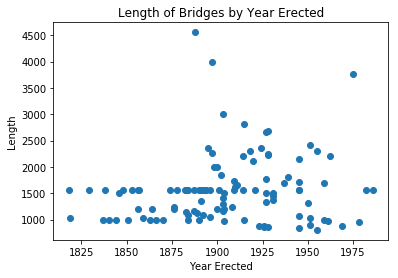

In [74]:
# Since there are only 107 total values and 27 of those were filled with the mean, you can see a clear line where those values were filled in

plt.scatter(bridgedf['Year Erected'], bridgedf['Length'])
plt.title('Length of Bridges by Year Erected')bridgedf['Length']
plt.xlabel('Year Erected')
plt.ylabel('Length')
plt.show()

##Histogram

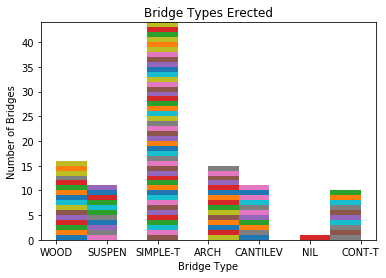

In [94]:
plt.hist(bridgedf['Type'], stacked=True)
plt.title('Bridge Types Erected')
plt.xlabel('Bridge Type')
plt.ylabel('Number of Bridges')
bridgedf['Type'].hist;

## Density Plot

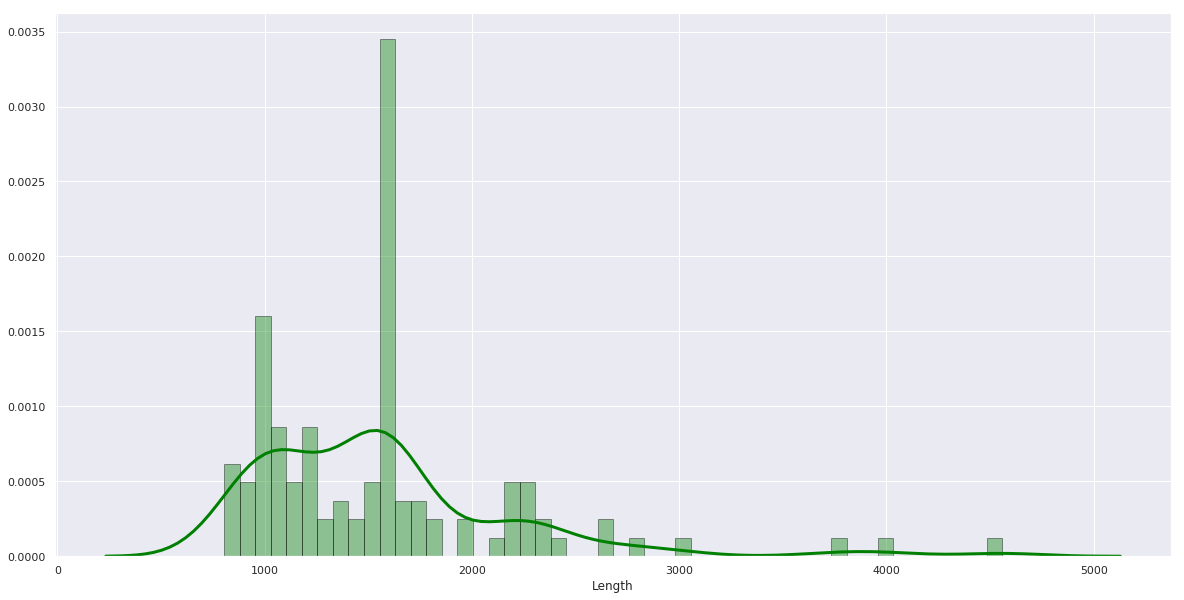

In [116]:
sns.distplot(bridgedf['Length'], hist=True, kde=True, bins=int(50), color = 'green', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 3})
sns.set(rc={'figure.figsize':(20,10)});

## Pairplot

In [0]:
??sns.pairplot()

ValueError: ignored

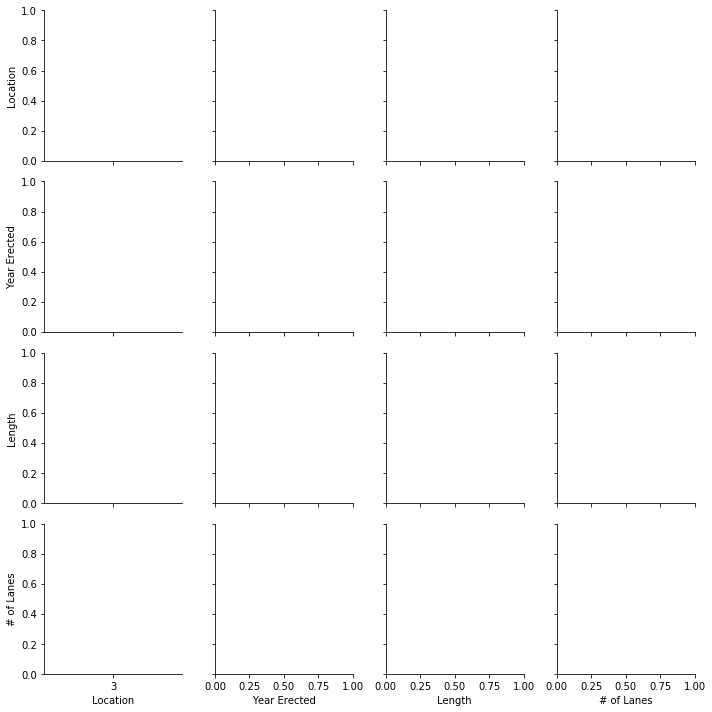

In [90]:
sns.pairplot(bridgedf)

In [89]:
# It appears I can't specify the columns I want to use
sns.pairplot(bridgedf['Year Erected'],bridgedf['Length'],bridgedf['# of Lanes'])

TypeError: ignored

## Stretch Goals - Other types and sources of data

Not all data comes in a nice single file - for example, image classification involves handling lots of image files. You still will probably want labels for them, so you may have tabular data in addition to the image blobs - and the images may be reduced in resolution and even fit in a regular csv as a bunch of numbers.

If you're interested in natural language processing and analyzing text, that is another example where, while it can be put in a csv, you may end up loading much larger raw data and generating features that can then be thought of in a more standard tabular fashion.

Overall you will in the course of learning data science deal with loading data in a variety of ways. Another common way to get data is from a database - most modern applications are backed by one or more databases, which you can query to get data to analyze. We'll cover this more in our data engineering unit.

How does data get in the database? Most applications generate logs - text files with lots and lots of records of each use of the application. Databases are often populated based on these files, but in some situations you may directly analyze log files. The usual way to do this is with command line (Unix) tools - command lines are intimidating, so don't expect to learn them all at once, but depending on your interests it can be useful to practice.

One last major source of data is APIs: https://github.com/toddmotto/public-apis

API stands for Application Programming Interface, and while originally meant e.g. the way an application interfaced with the GUI or other aspects of an operating system, now it largely refers to online services that let you query and retrieve data. You can essentially think of most of them as "somebody else's database" - you have (usually limited) access.

*Stretch goal* - research one of the above extended forms of data/data loading. See if you can get a basic example working in a notebook. Image, text, or (public) APIs are probably more tractable - databases are interesting, but there aren't many publicly accessible and they require a great deal of setup.